<a href="https://colab.research.google.com/github/asianjack19/COMP6577/blob/master/Research_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris

Settings to display all rows and columns

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_column", None)

Import Dataset

In [ ]:
populationData = pd.read_csv("https://raw.githubusercontent.com/asianjack19/Research-Paper-Flood-Intensity-Population/master/Datasets/Population%20Data/Jakarta-population-2021-05-13.csv", error_bad_lines=False)

floodData2013 = pd.read_csv("https://raw.githubusercontent.com/asianjack19/Research-Paper-Flood-Intensity-Population/master/Datasets/Flood%20Data/data-rekapitulasi-kejadian-banjir-tahun-2013.csv")
floodData2014 = pd.read_csv("https://raw.githubusercontent.com/asianjack19/Research-Paper-Flood-Intensity-Population/master/Datasets/Flood%20Data/data-rekapitulasi-kejadian-banjir-tahun-2014.csv")
floodData2015 = pd.read_csv("https://raw.githubusercontent.com/asianjack19/Research-Paper-Flood-Intensity-Population/master/Datasets/Flood%20Data/data-rekapitulasi-kejadian-banjir-tahun-2015.csv")
floodData2016 = pd.read_csv("https://raw.githubusercontent.com/asianjack19/Research-Paper-Flood-Intensity-Population/master/Datasets/Flood%20Data/data-rekapitulasi-kejadian-banjir-tahun-2016.csv")
floodData2017 = pd.read_csv("https://raw.githubusercontent.com/asianjack19/Research-Paper-Flood-Intensity-Population/master/Datasets/Flood%20Data/data-rekapitulasi-kejadian-banjir-tahun-2017.csv")
floodData2018 = pd.read_csv("https://raw.githubusercontent.com/asianjack19/Research-Paper-Flood-Intensity-Population/master/Datasets/Flood%20Data/data-rekapitulasi-kejadian-banjir-tahun-2018.csv")
floodData2019 = pd.read_csv("https://raw.githubusercontent.com/asianjack19/Research-Paper-Flood-Intensity-Population/master/Datasets/Flood%20Data/data-rekapitulasi-kejadian-banjir-tahun-2019.csv")
floodData2020 = pd.read_csv("https://raw.githubusercontent.com/asianjack19/Research-Paper-Flood-Intensity-Population/master/Datasets/Flood%20Data/data-rekapitulasi-kejadian-banjir-tahun-2020.csv")

"getFI" Function to Calculate Flood Intensity

In [ ]:
def getFl(frame):
  j = 0
  count = 0
  d = [0]*12
  
  for i in frame["rata_rata_ketinggian_air"]:
    if i == "0":
      x[0] = 0
      x[1] = 0
      count+=1
    else: 
      x = i.split("-")
    b = int(x[0])
    c = int(x[1])
    d.append(0)
    frame["lama_genangan"] = frame["lama_genangan"].astype(float)
    if frame["lama_genangan"][j] != 0:
      d[j] = (((b+c)/2)/30) * (np.cbrt((30/frame["lama_genangan"][j]) ** 2))
    j+=1

  total = 0
  for i in d:
    total += i
  total += count*(total/12)
  return total

Fill NaN data with 0 values

In [ ]:
floodData2013 = floodData2013.fillna("0")
floodData2014 = floodData2014.fillna("0")
floodData2015 = floodData2015.fillna("0")
floodData2016 = floodData2016.fillna("0")
floodData2017 = floodData2017.fillna("0")
floodData2018 = floodData2018.fillna("0")
floodData2019 = floodData2019.fillna("0")
floodData2020 = floodData2020.fillna("0")

Pre-processing Population Data

In [ ]:
#Rename Date Column to Year
populationData.columns = ['year', 'population', 'annual change']

#Change the format of the year
populationData["year"] = pd.to_datetime(populationData["year"])
populationData["year"] = populationData["year"].dt.year

#Select column based on year
populationData["year"] = populationData[(populationData["year"] <= 2020) & (populationData["year"] >= 2013)]

#Drop NaN values and recast to int
populationData = populationData.dropna()
populationData["year"]= populationData["year"].astype(int)

#Get total population in jakarta for each corresponding year
x1 = populationData["population"].to_numpy()
newData = pd.DataFrame(x1, columns = ["total_population"], index = [2013,2014,2015,2016,2017,2018,2019,2020])
print(newData)

      total_population
2013           9951000
2014          10061000
2015          10173000
2016          10287000
2017          10401000
2018          10517000
2019          10639000
2020          10770000


Plot the yearly population growth in Jakarta

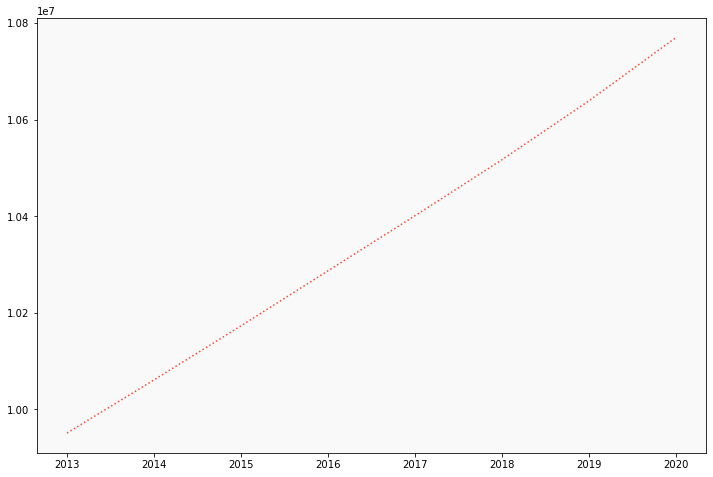

In [ ]:
ypoints = newData["total_population"]
plt.figure(figsize=(12, 8))
plt.axes().set_facecolor("#f9f9f9")
plt.plot(ypoints, linestyle = 'dotted', color='#fc4630')
plt.show()

Get Flood Intensity

In [ ]:
floodIntensity2013 = getFl(floodData2013)/12
floodIntensity2014 = getFl(floodData2014)/12
floodIntensity2015 = getFl(floodData2015)/12
floodIntensity2016 = getFl(floodData2016)/12
floodIntensity2017 = getFl(floodData2017)/12
floodIntensity2018 = getFl(floodData2018)/12
floodIntensity2019 = getFl(floodData2019)/12
floodIntensity2020 = getFl(floodData2020)/12
newData["flood_intensity(mm/day)"] = [floodIntensity2013, floodIntensity2014, floodIntensity2015, floodIntensity2016, floodIntensity2017, floodIntensity2018, floodIntensity2019, floodIntensity2020]
print(newData)

      total_population  flood_intensity(mm/day)
2013           9951000                12.240459
2014          10061000                14.634436
2015          10173000                10.903873
2016          10287000                19.725217
2017          10401000                14.770075
2018          10517000                16.169076
2019          10639000                16.331490
2020          10770000                21.963088


Convert "jiwa_terdampak" column in each dataframe to float

In [ ]:
floodData2013['jiwa_terdampak']=floodData2013['jiwa_terdampak'].astype(str).astype(float)
floodData2014['jiwa_terdampak']=floodData2014['jiwa_terdampak'].astype(str).astype(float)
floodData2015['jiwa_terdampak']=floodData2015['jiwa_terdampak'].astype(str).astype(float)
floodData2016['jiwa_terdampak']=floodData2016['jiwa_terdampak'].astype(str).astype(float)
floodData2017['jiwa_terdampak']=floodData2017['jiwa_terdampak'].astype(str).astype(float)
floodData2018['jiwa_terdampak']=floodData2018['jiwa_terdampak'].astype(str).astype(float)
floodData2019['jiwa_terdampak']=floodData2019['jiwa_terdampak'].astype(str).astype(float)
floodData2020['jiwa_terdampak']=floodData2020['jiwa_terdampak'].astype(str).astype(float)

Get the sum of "jiwa_terdampak" column from each dataframe

In [ ]:
affectedPeople2013 = sum(floodData2013["jiwa_terdampak"])
affectedPeople2014 = sum(floodData2014["jiwa_terdampak"])
affectedPeople2015 = sum(floodData2015["jiwa_terdampak"])
affectedPeople2016 = sum(floodData2016["jiwa_terdampak"])
affectedPeople2017 = sum(floodData2017["jiwa_terdampak"])
affectedPeople2018 = sum(floodData2018["jiwa_terdampak"])
affectedPeople2019 = sum(floodData2019["jiwa_terdampak"])
affectedPeople2020 = sum(floodData2020["jiwa_terdampak"])
newData["affectedpeople"] = [affectedPeople2013, affectedPeople2014, affectedPeople2015, affectedPeople2016,affectedPeople2017,affectedPeople2018 ,affectedPeople2019, affectedPeople2020]

Update Outliers to mean

In [ ]:
newDataMean = newData["flood_intensity(mm/day)"].mean()
newData.at[2015, 'flood_intensity(mm/day)'] =  newDataMean
newData.at[2016, 'flood_intensity(mm/day)'] =  newDataMean

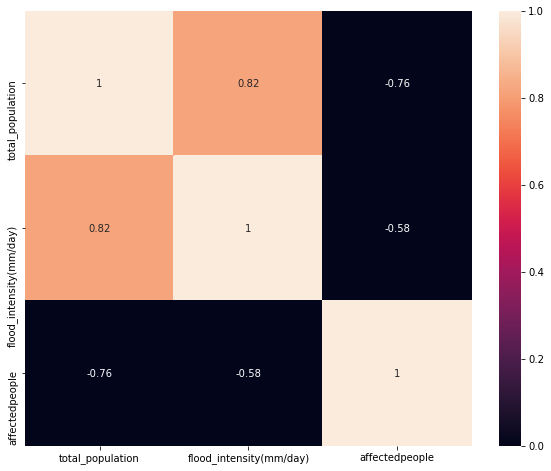

In [ ]:
corr_matrix = newData.corr()
plt.figure(figsize = (10,8))
heatmap = sb.heatmap(corr_matrix, vmin=0, vmax=1, annot=True)

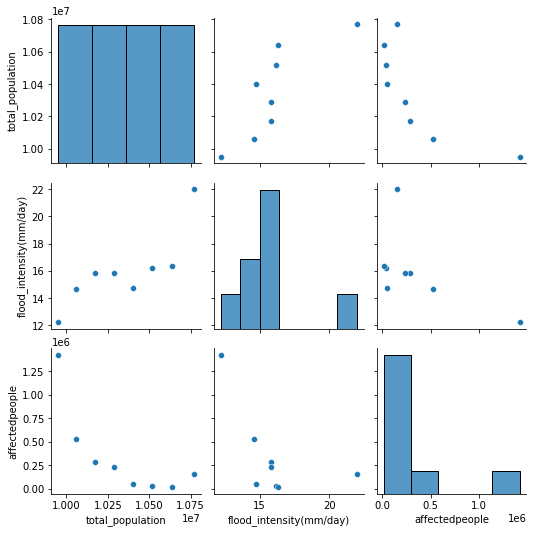

In [ ]:
sb.pairplot(newData)

Text(0, 0.5, 'Flood Intensity (mm)')

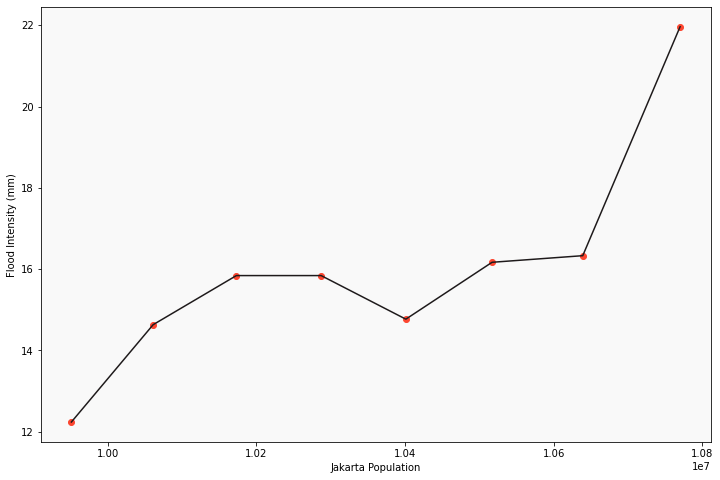

In [ ]:
xpoints = newData["total_population"]
ypoints = newData["flood_intensity(mm/day)"]
plt.figure(figsize=(12, 8))
plt.axes().set_facecolor("#f9f9f9")
plt.scatter(xpoints,ypoints, color="#fc4630")
plt.plot(xpoints,ypoints, linestyle = 'solid', color='#1e1a1b')
plt.xlabel("Jakarta Population")
plt.ylabel("Flood Intensity (mm)")

<Figure size 2160x1440 with 0 Axes>

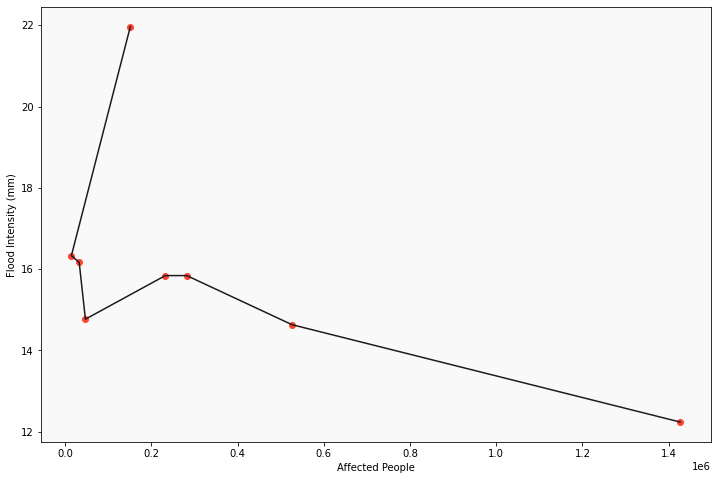

<Figure size 2160x1440 with 0 Axes>

In [ ]:
xpoints = newData["affectedpeople"]
ypoints = newData["flood_intensity(mm/day)"]
plt.figure(figsize=(12, 8))
plt.axes().set_facecolor("#f9f9f9")
plt.scatter(xpoints,ypoints, color="#fc4630")
plt.plot(xpoints,ypoints, linestyle = 'solid', color='#1e1a1b',)
plt.xlabel("Affected People")
plt.ylabel("Flood Intensity (mm)")
plt.figure(figsize = (30,20))

4 Prediction Model

Test Evaluation Metrics
R2 Score :  0.6287419307102522
MAE      :  1.1811266916487755
MSE      :  1.4325019753081627
[[7.62475961e-06]] [-62.64589551]


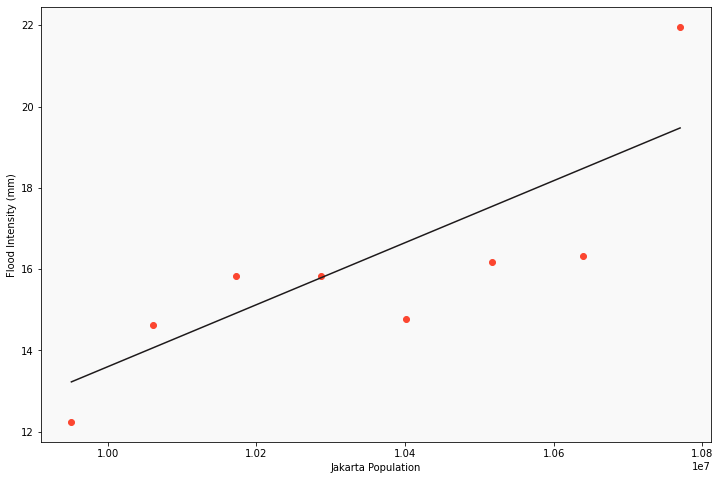

In [ ]:
#Linear Regression 1
train, test = train_test_split(newData, test_size=0.15)
regression = linear_model.LinearRegression()
regression.fit(train[["total_population"]], train[["flood_intensity(mm/day)"]])
prediction = regression.predict(test[["total_population"]])

plt.figure(figsize=(12, 8))
plt.axes().set_facecolor("#f9f9f9")
plt.scatter(newData["total_population"], newData["flood_intensity(mm/day)"],color='#fc4630')
plt.plot(newData[["total_population"]], regression.coef_ * newData[["total_population"]] + regression.intercept_, '#1e1a1b')
plt.xlabel("Jakarta Population")
plt.ylabel("Flood Intensity (mm)")

#Test Model Evaluation:
print("Test Evaluation Metrics")
print("R2 Score : ", r2_score(test[["flood_intensity(mm/day)"]], prediction))
print("MAE      : ", mean_absolute_error(test[["flood_intensity(mm/day)"]], prediction))
print("MSE      : ", mean_squared_error(test[["flood_intensity(mm/day)"]], prediction))
print(regression.coef_ ,regression.intercept_)

Test Evaluation Metrics
R2 Score :  0.6684762926241361
MAE      :  1.311013784204879
MSE      :  2.2068271732523215
[[7.91363536e-06]] [-65.93100508]


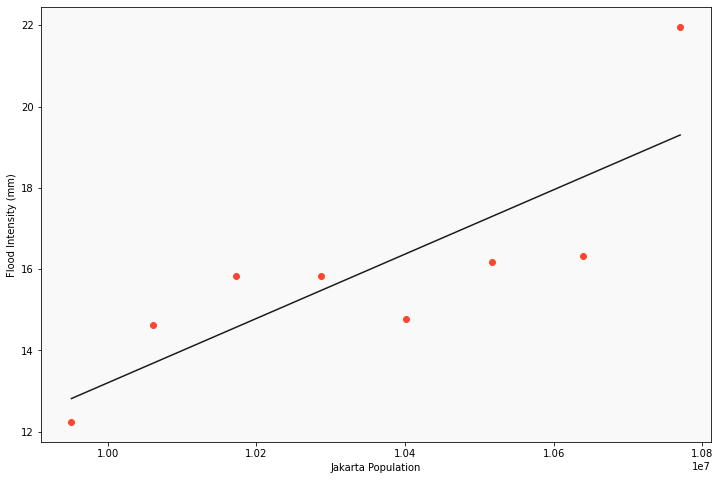

In [ ]:
#Linear Regression 2
regression = linear_model.LinearRegression()
regression.fit(newData[["total_population"]], newData[["flood_intensity(mm/day)"]])
prediction = regression.predict(newData[["total_population"]])

plt.figure(figsize=(12, 8))
plt.axes().set_facecolor("#f9f9f9")
plt.scatter(newData["total_population"], newData["flood_intensity(mm/day)"],color='#fc4630')
plt.plot(newData[["total_population"]], regression.coef_ * newData[["total_population"]] + regression.intercept_, '#1e1a1b')
plt.xlabel("Jakarta Population")
plt.ylabel("Flood Intensity (mm)")

#Test Model Evaluation:
print("Test Evaluation Metrics")
print("R2 Score : ", r2_score(newData[["flood_intensity(mm/day)"]], prediction))
print("MAE      : ", mean_absolute_error(newData[["flood_intensity(mm/day)"]], prediction))
print("MSE      : ", mean_squared_error(newData[["flood_intensity(mm/day)"]], prediction))
print(regression.coef_ ,regression.intercept_)

In [ ]:
#Multivariate Linear Regression 1
train, test = train_test_split(newData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["total_population","affectedpeople"]], train[["flood_intensity(mm/day)"]])
prediction = regression.predict(test[["total_population","affectedpeople"]])

print(train)
print(test)
print(regression.coef_ ,regression.intercept_)

#Test Model Evaluation:
print("\nTest Evaluation Metrics")
print("R2 Score : ", r2_score(test[["flood_intensity(mm/day)"]], prediction))
print("MAE      : ", mean_absolute_error(test[["flood_intensity(mm/day)"]], prediction))
print("MSE      : ", mean_squared_error(test[["flood_intensity(mm/day)"]], prediction))


      total_population  flood_intensity(mm/day)  affectedpeople
2018          10517000                16.169076         32703.0
2017          10401000                14.770075         47203.0
2019          10639000                16.331490         14659.0
2014          10061000                14.634436        526353.0
2015          10173000                15.842214        282138.0
2016          10287000                15.842214        232577.0
      total_population  flood_intensity(mm/day)  affectedpeople
2013           9951000                12.240459       1426478.0
2020          10770000                21.963088        151337.0
[[2.93036552e-06 9.83110084e-07]] [-14.90636284]

Test Evaluation Metrics
R2 Score :  0.1896992935211651
MAE      :  4.288131617873818
MSE      :  19.149331646139988


In [ ]:
#Multivariate Linear Regression 2
regression = linear_model.LinearRegression()
regression.fit(newData[["total_population","affectedpeople"]], newData[["flood_intensity(mm/day)"]])
prediction = regression.predict(newData[["total_population","affectedpeople"]])

print(train)
print(test)
print(regression.coef_ ,regression.intercept_)

#Test Model Evaluation:
print("\nTest Evaluation Metrics")
print("R2 Score : ", r2_score(newData[["flood_intensity(mm/day)"]], prediction))
print("MAE      : ", mean_absolute_error(newData[["flood_intensity(mm/day)"]], prediction))
print("MSE      : ", mean_squared_error(newData[["flood_intensity(mm/day)"]], prediction))

      total_population  flood_intensity(mm/day)  affectedpeople
2018          10517000                16.169076         32703.0
2017          10401000                14.770075         47203.0
2019          10639000                16.331490         14659.0
2014          10061000                14.634436        526353.0
2015          10173000                15.842214        282138.0
2016          10287000                15.842214        232577.0
      total_population  flood_intensity(mm/day)  affectedpeople
2013           9951000                12.240459       1426478.0
2020          10770000                21.963088        151337.0
[[8.62650123e-06 5.70833374e-07]] [-73.50269356]

Test Evaluation Metrics
R2 Score :  0.6725463232197629
MAE      :  1.353799963226247
MSE      :  2.1797345282481606


      total_population  flood_intensity(mm/day)  affectedpeople
2015          10173000                15.842214        282138.0
2014          10061000                14.634436        526353.0
2020          10770000                21.963088        151337.0
2017          10401000                14.770075         47203.0
2018          10517000                16.169076         32703.0
2019          10639000                16.331490         14659.0
      total_population  flood_intensity(mm/day)  affectedpeople
2016          10287000                15.842214        232577.0
2013           9951000                12.240459       1426478.0

R2 Score       :  0.9027002231665401
MAE Score      :  0.45814917751812345
MSE Score      :  0.3155587333883097


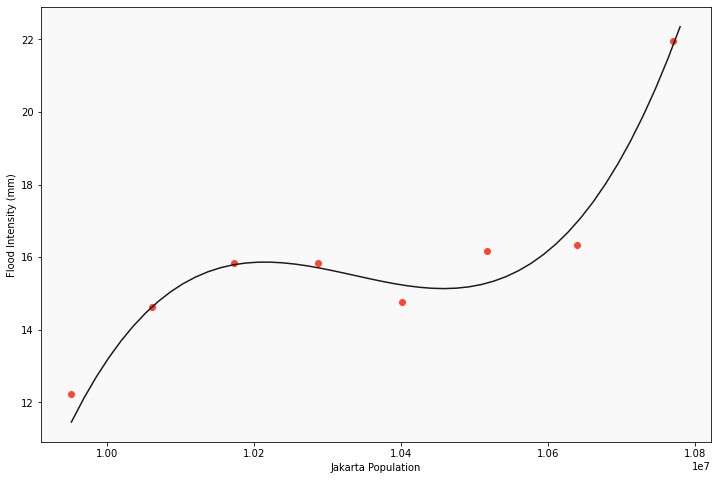

In [ ]:
#Polynomial Regression 1
train, test = train_test_split(newData, test_size=0.25)
mymodel = np.poly1d(np.polyfit(train["total_population"], train["flood_intensity(mm/day)"], 3))
myline = np.linspace(newData["total_population"].min(), newData["total_population"].max()+10000)

plt.figure(figsize=(12, 8))
plt.axes().set_facecolor("#f9f9f9")
plt.scatter(newData["total_population"], newData["flood_intensity(mm/day)"],color='#fc4630')
plt.plot(myline, mymodel(myline),'#1e1a1b')
plt.xlabel("Jakarta Population")
plt.ylabel("Flood Intensity (mm)")


print(train)
print(test)

print("\nR2 Score       : ", r2_score(test["flood_intensity(mm/day)"], mymodel(test["total_population"])))
print("MAE Score      : ", mean_absolute_error(test["flood_intensity(mm/day)"], mymodel(test["total_population"])))
print("MSE Score      : ", mean_squared_error(test["flood_intensity(mm/day)"], mymodel(test["total_population"])))


R2 Score       :  0.9715341048393574
MAE Score      :  0.3430923924968876
MSE Score      :  0.1894866326414375


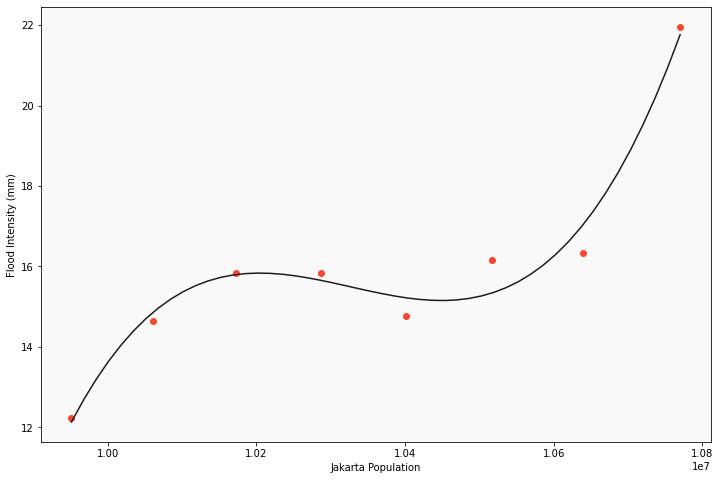

In [ ]:
#Polynomial Regression 2
mymodel = np.poly1d(np.polyfit(newData["total_population"], newData["flood_intensity(mm/day)"], 3))
myline = np.linspace(newData["total_population"].min(), newData["total_population"].max())

plt.figure(figsize=(12, 8))
plt.axes().set_facecolor("#f9f9f9")
plt.scatter(newData["total_population"], newData["flood_intensity(mm/day)"],color='#fc4630')
plt.plot(myline, mymodel(myline),'#1e1a1b')
plt.xlabel("Jakarta Population")
plt.ylabel("Flood Intensity (mm)")

print("\nR2 Score       : ", r2_score(newData["flood_intensity(mm/day)"], mymodel(newData["total_population"])))
print("MAE Score      : ", mean_absolute_error(newData["flood_intensity(mm/day)"], mymodel(newData["total_population"])))
print("MSE Score      : ", mean_squared_error(newData["flood_intensity(mm/day)"], mymodel(newData["total_population"])))

Predicted values  [16.47 15.75]
Real values       [16.3314904  15.84221433]
R2 Score       :  0.764477083785289
MAE Score      :  0.11611574150084181
MSE Score      :  0.01409552076957536


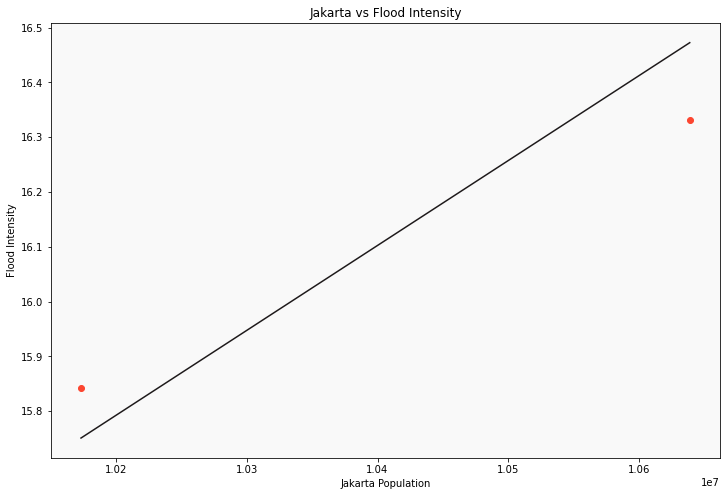

Predicted values  [15.41 15.58 15.75]
Real values       [12.24045926 14.63443578 15.84221433]
R2 Score       :  0.23560153108228843
MAE Score      :  1.3953909019332518
MSE Score      :  5.088309749406742


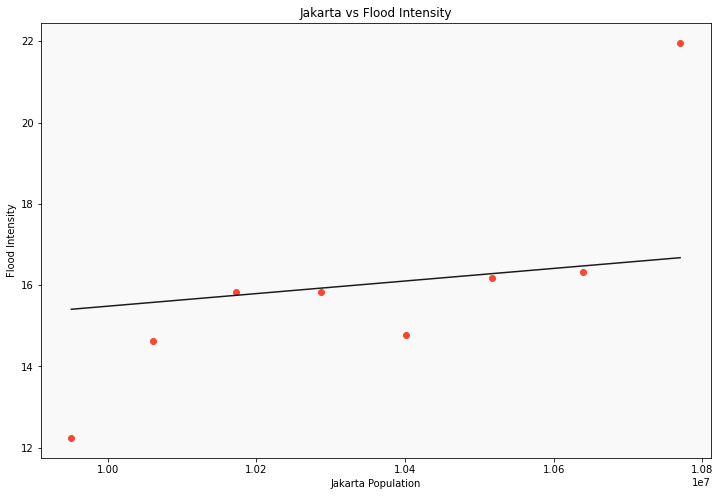

In [ ]:
 #Ridge Regression 1 & 2
class RidgeRegression():
    def __init__(self, learning_rate, iterations, l2_penality):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penality = l2_penality
        
    # Function for model training            
    def fit( self, X, Y ):

        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
        self.b = 0        
        self.X = X        
        self.Y = Y
        
        # gradient descent learning
        for i in range(self.iterations):            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = (-(2 * ( self.X.T ).dot(self.Y - Y_pred)) + (2 * self.l2_penality * self.W))/self.m     
        db = -2 * np.sum(self.Y - Y_pred)/self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict(self, X):    
        return X.dot(self.W) + self.b


df1 = newData[["total_population", "flood_intensity(mm/day)"]]
X = df1.iloc[:, :-1].values
Y = df1.iloc[:, 1].values


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
model = RidgeRegression(iterations = 100, learning_rate = 0.000000000000001, l2_penality = 1)
model.fit(X_train, Y_train)
      
# Prediction on test set
Y_pred = model.predict(X_test)
print( "Predicted values ", np.round(Y_pred[:3], 2))
print( "Real values      ", Y_test[:3])
print("R2 Score       : ", r2_score(Y_test, Y_pred))
print("MAE Score      : ", mean_absolute_error(Y_test, Y_pred))
print("MSE Score      : ", mean_squared_error(Y_test, Y_pred))
# Visualization on test set
plt.figure(figsize=(12, 8))
plt.axes().set_facecolor("#f9f9f9")
plt.scatter( X_test, Y_test, color = '#fc4630')
plt.plot( X_test, Y_pred, color = '#1e1a1b')
plt.title('Jakarta vs Flood Intensity')
plt.xlabel("Jakarta Population")
plt.ylabel("Flood Intensity")
plt.show()

#Prediction on all set
Y_pred2 = model.predict(X)
print( "Predicted values ", np.round(Y_pred2[:3], 2))
print( "Real values      ", Y[:3])
print("R2 Score       : ", r2_score(Y, Y_pred2))
print("MAE Score      : ", mean_absolute_error(Y, Y_pred2))
print("MSE Score      : ", mean_squared_error(Y, Y_pred2))
# Visualization on test set
plt.figure(figsize=(12, 8))
plt.axes().set_facecolor("#f9f9f9")
plt.scatter( X, Y, color = '#fc4630')
plt.plot( X, Y_pred2, color = '#1e1a1b')
plt.title('Jakarta vs Flood Intensity')
plt.xlabel("Jakarta Population")
plt.ylabel("Flood Intensity")
plt.show()

      total_population  flood_intensity(mm/day)  affectedpeople
2017          10401000                14.770075         47203.0
2020          10770000                21.963088        151337.0
2014          10061000                14.634436        526353.0
2015          10173000                15.842214        282138.0
2018          10517000                16.169076         32703.0
2013           9951000                12.240459       1426478.0
      total_population  flood_intensity(mm/day)  affectedpeople
2019          10639000                16.331490         14659.0
2016          10287000                15.842214        232577.0

R2 Score       :  0.7796204755522295
MAE Score      :  0.08120721204867287
MSE Score      :  0.013189222577436242


[]

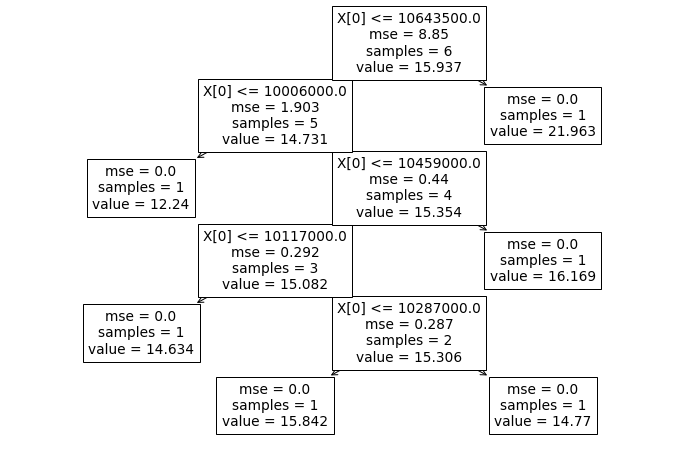

In [ ]:
#Decision Tree Regression 1
train, test = train_test_split(newData, test_size=0.25)
regressor = DecisionTreeRegressor()
regressor.fit(train[["total_population"]], train[["flood_intensity(mm/day)"]])
y_pred = regressor.predict(test[["total_population"]])

print(train)
print(test)

print("\nR2 Score       : ", r2_score(test["flood_intensity(mm/day)"], y_pred))
print("MAE Score      : ", mean_absolute_error(test["flood_intensity(mm/day)"], y_pred))
print("MSE Score      : ", mean_squared_error(test["flood_intensity(mm/day)"], y_pred))
plt.figure(figsize=(12, 8))
tree.plot_tree(regressor)  
plt.plot()


R2 Score       :  0.975177071641984
MAE Score      :  0.3052915012376749
MSE Score      :  0.1652367888069583


[]

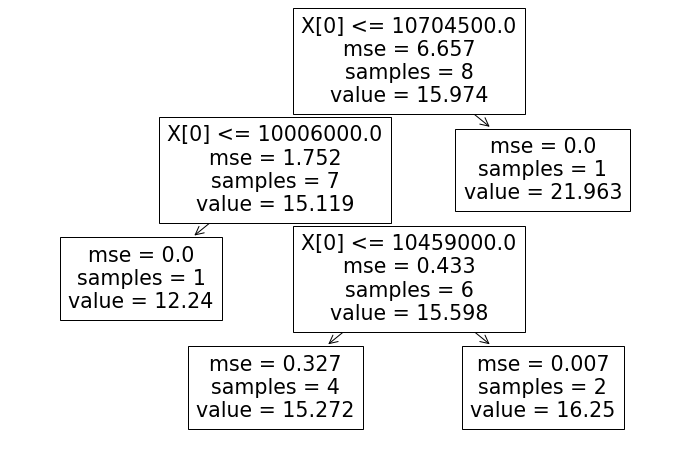

In [ ]:
#Decision Tree Regression 2
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(newData[["total_population"]], newData[["flood_intensity(mm/day)"]])
y_pred = regressor.predict(newData[["total_population"]])
print("\nR2 Score       : ", r2_score(newData["flood_intensity(mm/day)"], y_pred))
print("MAE Score      : ", mean_absolute_error(newData["flood_intensity(mm/day)"], y_pred))
print("MSE Score      : ", mean_squared_error(newData["flood_intensity(mm/day)"], y_pred))
plt.figure(figsize=(12, 8))
tree.plot_tree(regressor)  
plt.plot()